# Validação Cruzada
### adaptado do curso: 
<font color='BLUE'>Cientista de Dados na Prática </font>
                           
<font color='PURPLE'>Módulo 5 - Máquinas Preditivas</font>

# BaggingClassifier

In [40]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import (cohen_kappa_score,confusion_matrix,roc_auc_score,roc_curve,
                             classification_report)
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 6

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = BaggingClassifier(n_estimators = num_trees, max_features = max_features)
# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')

accuracy:[0.76623377 0.79220779 0.71428571 0.81818182 0.81818182 0.80519481
 0.64935065 0.81818182 0.80263158 0.73684211]
Mean accuracy:77.21291866028707
precision:[0.82608696 0.68181818 0.53333333 0.68421053 0.73913043 0.69565217
 0.55       0.80769231 0.52631579 0.69565217]
Mean precision:67.3989187776373
recall:[0.61290323 0.53846154 0.55555556 0.60869565 0.62962963 0.6
 0.44827586 0.63636364 0.6875     0.58064516]
Mean recall:58.980302613500136
f1_score = 62.909212156398574


In [60]:
ba_pred = cross_val_predict(modelo, X, Y, cv = kfold)

In [61]:
ba_pred

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [62]:
ba_curva_roc = roc_auc_score(Y,ba_pred)
ba_kappa = cohen_kappa_score(Y,ba_pred)
print(f'Kappa:{round(ba_kappa,2)}')
print(f'Curva ROC:{round(ba_curva_roc,2)}')

Kappa:0.47
Curva ROC:0.72


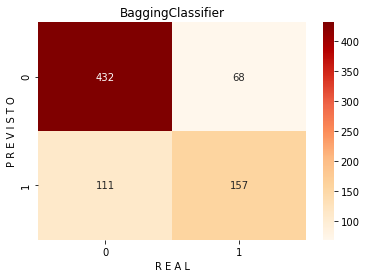

In [63]:
sns.heatmap(confusion_matrix(Y,ba_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('BaggingClassifier')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

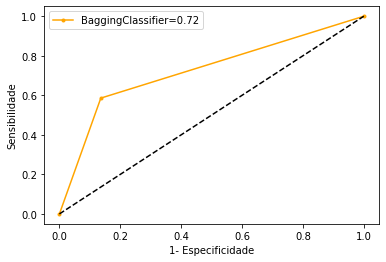

In [64]:
ba_fp,ba_vp,lim1 = roc_curve(Y,ba_pred)
plt.plot(ba_fp,ba_vp, marker='.', label='BaggingClassifier='+str(round(ba_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

# ExtraTree

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 5

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')

accuracy:[0.77922078 0.79220779 0.67532468 0.77922078 0.76623377 0.77922078
 0.68831169 0.80519481 0.82894737 0.72368421]
Mean accuracy:76.17566643882434
precision:[0.79166667 0.75       0.57142857 0.65217391 0.71428571 0.7
 0.63157895 0.8        0.5625     0.75      ]
Mean precision:69.2363381279285
recall:[0.61290323 0.53846154 0.62962963 0.65217391 0.55555556 0.52
 0.4137931  0.6969697  0.6875     0.58064516]
Mean recall:58.8763182420495
f1_score = 63.6374390015275


In [67]:
extra_pred = cross_val_predict(modelo, X, Y, cv = kfold)

In [68]:
extra_pred

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0.

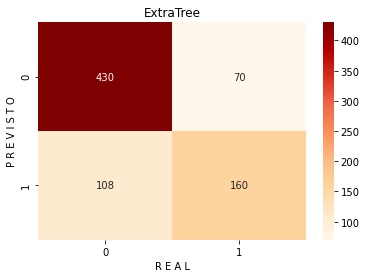

In [69]:
sns.heatmap(confusion_matrix(Y,extra_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('ExtraTree')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [70]:
extra_curva_roc = roc_auc_score(Y,extra_pred)
extra_kappa = cohen_kappa_score(Y,extra_pred)
print(f'Kappa:{round(extra_kappa,2)}')
print(f'Curva ROC:{round(extra_curva_roc,2)}')

Kappa:0.47
Curva ROC:0.73


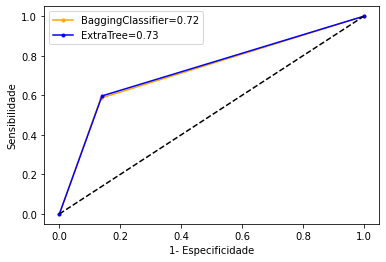

In [73]:
ba_fp,ba_vp,lim1 = roc_curve(Y,ba_pred)
extra_fp,extra_vp,lim2 = roc_curve(Y,extra_pred)
plt.plot(ba_fp,ba_vp, marker='.', label='BaggingClassifier='+str(round(ba_curva_roc,2)),color="orange")
plt.plot(extra_fp,extra_vp, marker='.', label='ExtraTree='+str(round(extra_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()

# Random Forest

In [94]:
# Import dos módulos
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(num_folds, shuffle= True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
for score in ["accuracy", "precision", "recall"]:
        resultado = cross_val_score(modelo, X, Y, cv = kfold,scoring=score)
        if score == 'precision':
            precision = resultado.mean()
        elif score == 'recall':
            recall = resultado.mean()        
        print(f'{score}:{resultado}')
        print(f'Mean {score}:{resultado.mean() * 100}')
        
f1_score = (2 * precision * recall) / (precision + recall)
print(f'f1_score = {f1_score * 100}')

accuracy:[0.76623377 0.79220779 0.71428571 0.77922078 0.80519481 0.81818182
 0.67532468 0.77922078 0.81578947 0.76315789]
Mean accuracy:77.08817498291182
precision:[0.70967742 0.72727273 0.58064516 0.63636364 0.77272727 0.72727273
 0.55       0.85185185 0.52631579 0.7826087 ]
Mean precision:68.64735281259236
recall:[0.67741935 0.61538462 0.66666667 0.56521739 0.62962963 0.6
 0.31034483 0.72727273 0.625      0.5483871 ]
Mean recall:59.653223094570976
f1_score = 63.83503461659302


In [95]:
rf_pred = cross_val_predict(modelo, X, Y, cv = kfold)

In [97]:
rf_pred

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0.

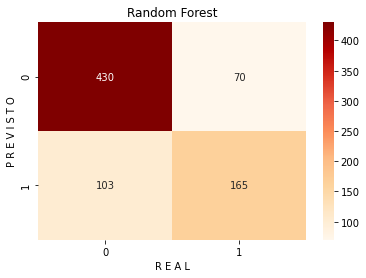

In [98]:
sns.heatmap(confusion_matrix(Y,rf_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [99]:
rf_curva_roc = roc_auc_score(Y,rf_pred)
rf_kappa = cohen_kappa_score(Y,rf_pred)
print(f'Kappa:{round(rf_kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Kappa:0.49
Curva ROC:0.74


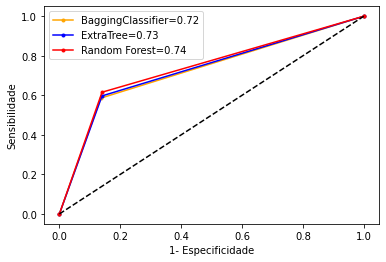

In [100]:
ba_fp,ba_vp,lim1 = roc_curve(Y,ba_pred)
extra_fp,extra_vp,lim2 = roc_curve(Y,extra_pred)
rf_fp,rf_vp,lim2 = roc_curve(Y,rf_pred)
plt.plot(ba_fp,ba_vp, marker='.', label='BaggingClassifier='+str(round(ba_curva_roc,2)),color="orange")
plt.plot(extra_fp,extra_vp, marker='.', label='ExtraTree='+str(round(extra_curva_roc,2)),color="blue")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="red")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()